# K-Means Clustering

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('mcdonalds.csv')

In [3]:
dataset.replace({'tasty':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'expensive':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'healthy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'disgusting':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'Like':{'I love it!+5':1,'I hate it!-5':2}},inplace=True)
dataset.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
dataset.replace({'yummy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'convenient':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'spicy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'fattening':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'greasy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'fast':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'cheap':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'VisitFrequency':{'Every three months':1,'Never':0,'Once a month':2,'Once a year':3,'More than once a week':4,'Once a week':5}},inplace=True)

In [4]:
X = dataset

In [5]:
X.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1


In [9]:
X.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.281653,0.261863,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.070597,0.172780,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.146217,-0.003369,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.139254,-0.061557,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.233554,-0.082937,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.020558,0.039606,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.016958,0.081930,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.194576,0.229819,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.070851,-0.026647,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.021366,0.115854,-0.042455


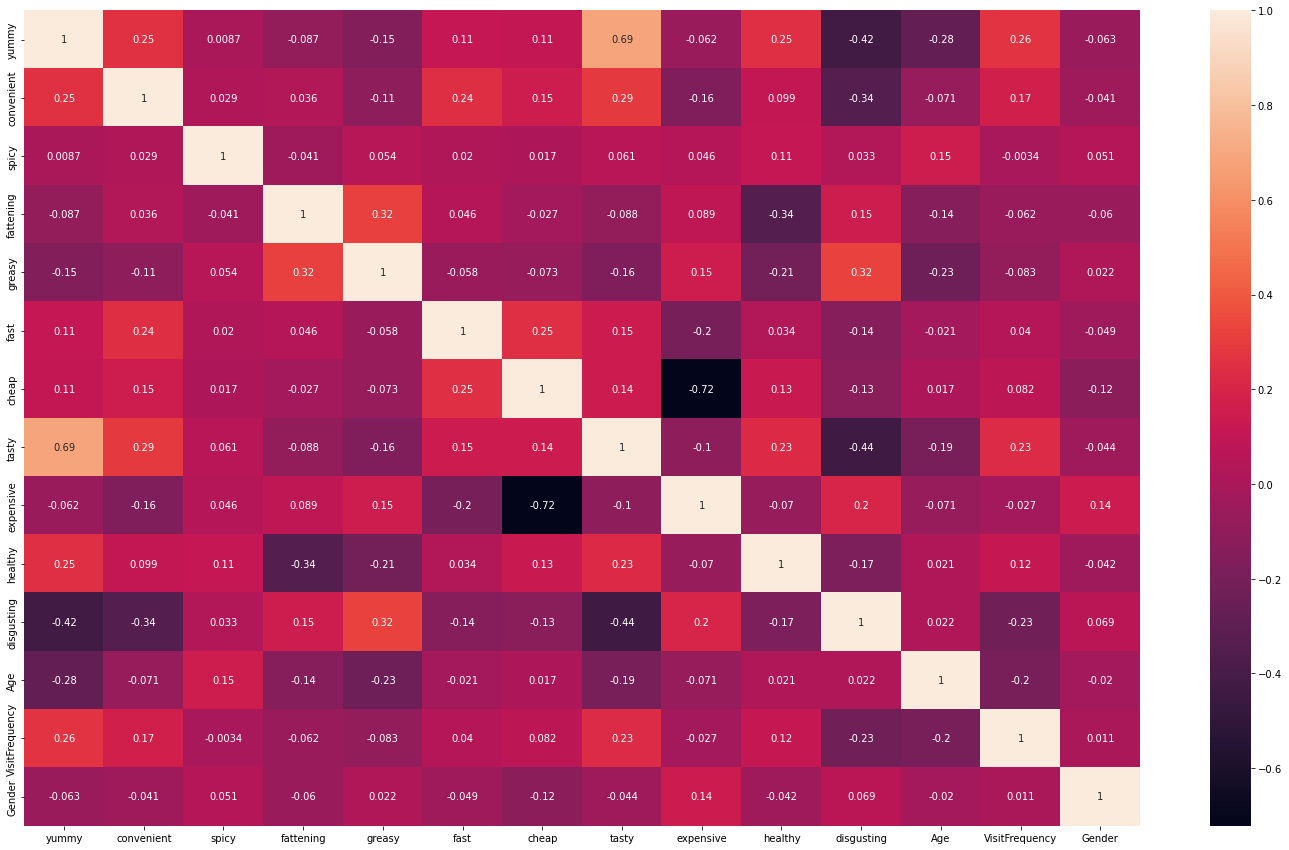

In [15]:
f,ax=plt.subplots(figsize=(25,15))
sns.heatmap(X.corr(), annot=True)

## Using the elbow method to find the optimal number of clusters

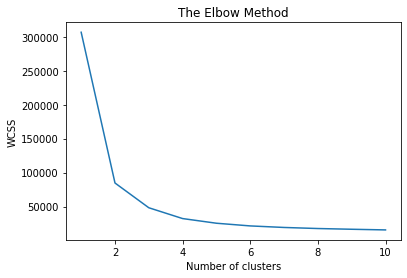

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit(X)

In [17]:
kmeans.cluster_centers_

array([[5.26086957e-01, 9.04347826e-01, 7.82608696e-02, 8.84782609e-01,
        5.04347826e-01, 8.73913043e-01, 5.30434783e-01, 6.17391304e-01,
        4.30434783e-01, 2.08695652e-01, 2.71739130e-01, 1.12608696e+00,
        4.23695652e+01, 2.40000000e+00, 4.82608696e-01],
       [4.21143847e-01, 8.90814558e-01, 1.36915078e-01, 8.18024263e-01,
        4.19410745e-01, 9.09878683e-01, 6.36048527e-01, 5.61525130e-01,
        2.94627383e-01, 2.02772964e-01, 2.42634315e-01, 7.67764298e-01,
        5.92391681e+01, 1.96187175e+00, 4.36741768e-01],
       [7.64423077e-01, 9.35096154e-01, 5.04807692e-02, 9.15865385e-01,
        6.99519231e-01, 9.15865385e-01, 6.22596154e-01, 7.88461538e-01,
        3.65384615e-01, 1.82692308e-01, 2.11538462e-01, 1.58653846e+00,
        2.67788462e+01, 2.71875000e+00, 4.59134615e-01]])